In [123]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests

#step 1
#this part reads the table from the website in html and converts it into a pandas dataframe
url = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares"
r = requests.get(url)

data = r.text
soup = BeautifulSoup(data, 'html5lib')

content = soup.find('table')
data = pd.read_html(str(content), flavor='html5lib')
df = pd.DataFrame(data[0])
df.columns = ['rank', 'x_class', 'date', 'region', 'start_time', 'maximum_time', 'end_time', 'movie']
df

,rank,x_class,date,region,start_time,maximum_time,end_time,movie
0,1,X28.0,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17.0,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10.0,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,View archive
8,9,X9.0,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


In [124]:
#step 2
#the date columns and the time columns are combined into one column to have a datetime value type
#gets rid of extraneous columns
import datetime as dt
df = df.drop('movie', axis=1)
for index,row in df.iterrows():
    start = dt.datetime.strptime(row['date']+ " " + row['start_time'],"%Y/%m/%d %H:%M")
    maxi = dt.datetime.strptime(row['date']+ " " + row['maximum_time'],"%Y/%m/%d %H:%M")
    end = dt.datetime.strptime(row['date']+ " " + row['end_time'],"%Y/%m/%d %H:%M")
    df.set_value(index, 'start_datetime', start)
    df.set_value(index, 'max_datetime', maxi)
    df.set_value(index, 'end_datetime', end)
df = df[['rank', 'x_class','start_datetime','max_datetime','end_datetime','region']]
df.replace('-', np.NaN)
df

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [125]:
#step 3
# Similar to step 1, retrieves data from the website and converts it into a pandas dataframe.
# Since the website doesn't have table tags in the html, I split the string from the contents
# on PHTX since every line had that at the end. This gave me every row of data which I then
# split again to get each individual piece of data.
url = "http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html"
r = requests.get(url)

data = r.text
soup = BeautifulSoup(data, 'html5lib')

content = soup.find_all('pre')[0]
temp = []
strng = ""
for item in content.contents:
    if item.name == 'a':
        strng += item.text
    else:
        strng += item
temp = strng.split('PHTX')
temp[0] = temp[0].split('\n')[-1].rstrip()
for x in range (0, len(temp)):
    temp[x] = temp[x].split()

for x in temp:
    while len(x) > 14:
        x.pop(0)
    x.append('PHTX')
temp.pop()
df2 = pd.DataFrame(temp)
df2.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_freq', 'end_freq', 
               'flare_loc', 'flare_region', 'flare_class', 'cme_date', 'cme_time', 'cme_angle', 
               'cme_width', 'cme_speed', 'plot']
df2

,start_date,start_time,end_date,end_time,start_freq,end_freq,flare_loc,flare_region,flare_class,cme_date,cme_time,cme_angle,cme_width,cme_speed,plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,PHTX
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,PHTX
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX


In [127]:
#step 4
# After replacing all the missing data with Nan, I create a temporary array with binary values indicating 
# the halo, and the cme_width containing a >. Then I combine the date and time columns again. This was a little 
# tricky because only the start date had the full date. So I had to figure out a way to combine the year from
# the start date column with the other two date columns so I could create the new datetime columns.
df2 = df2.replace('------', np.NaN)
df2 = df2.replace('-----', np.NaN)
df2 = df2.replace('----', np.NaN)
df2 = df2.replace('---', np.NaN)
df2 = df2.replace('--/--', np.NaN)
df2 = df2.replace('--:--', np.NaN)
df2 = df2.replace('FILA', np.NaN)
df2 = df2.replace('????', np.NaN)
newrow = []
for index,row in df2.iterrows():
    newrow.append([row['cme_angle'] == 'Halo'])
    newrow[index].extend(['>' in str(row['cme_width'])])
    
newrow = np.array(newrow)

df2['is_halo'] = newrow[:,0]
df2['width_lower_bound'] = newrow[:,1]
df2 = df2.replace('Halo', np.NaN)
df2['cme_width'] = df2['cme_width'].str.extract('(\d+)',expand=False)
df2['start_datetime'] = pd.to_datetime(pd.to_datetime(df2.start_date) + pd.to_timedelta(df2.start_time+":00"))
for index,row in df2.iterrows():
    df2.set_value(index,'end_datetime',  pd.to_datetime(pd.to_datetime(str(row['start_datetime'].year)+"/"+row['end_date']) + pd.to_timedelta(str(row['end_time'])+":00")))
    if  type(row['cme_date']) == str:
        df2.set_value(index,'cme_datetime',  pd.to_datetime(pd.to_datetime(str(row['start_datetime'].year)+"/"+row['cme_date']) + pd.to_timedelta(str(row['cme_time'])+":00")))

df2 = df2[['start_datetime', 'end_datetime', 'start_freq', 'end_freq', 'flare_loc', 'flare_region', 
           'flare_class', 'cme_datetime',  'cme_angle', 'cme_width', 'cme_speed', 'plot', 'is_halo', 'width_lower_bound']]

In [128]:
#sorting top 50 solar flares from nasa data
for index,row in df2.iterrows():
    if type(row['flare_class']) == str:
        df2.set_value(index,'temp', float(row['flare_class'][1:]))
        df2.set_value(index,'temp2', row['flare_class'][0])
df2 = df2.sort(['temp2', 'temp'], ascending=[0, 0])
df2 = df2.drop('temp', axis = 1)
df2 = df2.drop('temp2', axis = 1)
df2

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,start_datetime,end_datetime,start_freq,end_freq,flare_loc,flare_region,flare_class,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound
242,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
234,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
235,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False
330,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False
290,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,PHTX,True,False
360,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610,PHTX,True,False


In [115]:
# Question 1
# The SpaceWeatherLive data can replicated closely. There are several rows
# in the SpaceWeatherLive data that are missing from the NASA data but the 
# rows that are in the NASA data almost match exactly.

In [130]:
# Question 2
# make sure flare_class has 0's
# I am defining the best matching rows by comparing the flare class and the start date. If these
# two are equal between the NASA data and the SpaceWeatherLive data then these rows are considered a match. 
# Otherwise, there is no match found.

for i,row in df2.iterrows():
    temp = str(row['flare_class']).split('.')
    if len(temp) > 1 and temp[1] == '':
        df2.set_value(i,'flare_class', row['flare_class']+'0')
        
for i, row in df.iterrows():
    df.set_value(i, 'start', row['start_datetime'].date())
    
for i, row in df2.head(50).iterrows():
    df2.set_value(i, 'start', row['start_datetime'].date())
    
df['index'] = range(1, len(df) + 1)
df2['index'] = range(1, len(df2) + 1)
merged = pd.merge(df2, df, left_on = ['flare_class', 'start'], right_on = ['x_class','start'])
df2 = df2.set_index('index')
for i in merged[["index_x", "index_y"]].itertuples(index=False):
    df2.set_value(i.index_x, 'rank', i.index_y)
df2

,start_datetime,end_datetime,start_freq,end_freq,flare_loc,flare_region,flare_class,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound,only_date,start,rank
index,,,,,,,,,,,,,,,,,
1,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200.0,S19W83,10486,X28.0,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False,2003,2003-11-04,1.0
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250.0,N19W72,9393,X20.0,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,2001,2001-04-02,2.0
3,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40.0,S16E08,10486,X17.0,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False,2003,2003-10-28,NaN
4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40.0,S20W85,9415,X14.0,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,2001,2001-04-15,NaN
5,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500.0,S15W02,10486,X10.0,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False,2003,2003-10-29,6.0
6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100.0,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,1997,1997-11-06,7.0
7,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250.0,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False,2006,2006-12-05,9.0
8,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250.0,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False,2003,2003-11-02,10.0
9,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25.0,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,PHTX,True,False,2005,2005-01-20,12.0


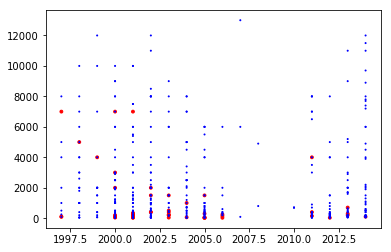

In [131]:
# Question 3
# a) The intent of this graph was to show if the frequency of solar flares changed over time. In addition
# there could be a some correlation between these two variables. 

# b)
import matplotlib.pyplot as plt
df2.end_freq = df2.end_freq.astype(float)
top50 = []
size = []
for index, row in df2.iterrows():
    if index < 51:
        size.append(8)
        top50.append('red')
    else:
        top50.append('blue')
        size.append(1)
df2["only_date"] = [d.date().year for d in df2["start_datetime"]]
%matplotlib inline
plt.scatter(df2.only_date, df2.end_freq, color=top50, s = size)
# c) This plot has the ending frequency vs time for all of the solar flares in the NASA data.
# The top 50 flares in red.
# d) It seems that as time goes on, the ending frequency of the top 50 solar flares goes down.
# It is evident from the plot that there are no frequencys above 4000 after 2001.